In [47]:
import pandas as pd

test_data = pd.DataFrame(data={'test_group': ['A']*10013 + ['B']*9985,
                               'conversion': [1]*611 + [0]*(10013-611) + [1]*889 + [0]*(9985-889)})

# Să verificăm dacă totul a fost generat corect:
test_data.groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
A             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
B              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

T-statistic: -7.53, p-value: 0.0
Diferenta este semnificativa, prin urmare putem respinge ipoteza nula.


C:\Users\gavri\AppData\Local\Temp\ipykernel_6344\3351749181.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_data['test_group'],


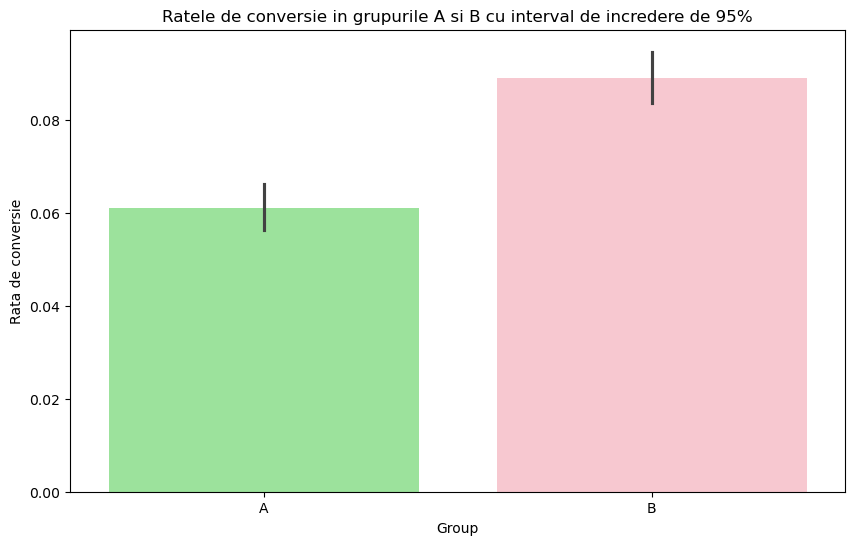

In [141]:
from scipy import stats

alpha = 0.05

statistic, pvalue = stats.ttest_ind(test_data[test_data['test_group'] == 'A']['conversion'],
                                    test_data[test_data['test_group'] == 'B']['conversion'], 
                                    alternative='less')

print(f'T-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('Diferenta este semnificativa, prin urmare putem respinge ipoteza nula.')
else:
    print('Diferenta nu este una semnificativa, prin urmare nu putem respinge ipoteza nula')

import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {'A': 'lightgreen', 'B': 'pink'}

plt.figure(figsize=(10, 6))
sns.barplot(x=test_data['test_group'], 
            y=test_data['conversion'],
            errorbar=('ci', 95), # Confidence Intervals
            palette = custom_palette)

plt.title('Ratele de conversie in grupurile A si B cu interval de incredere de 95%')
plt.ylabel('Rata de conversie')
plt.xlabel('Group')
plt.show()

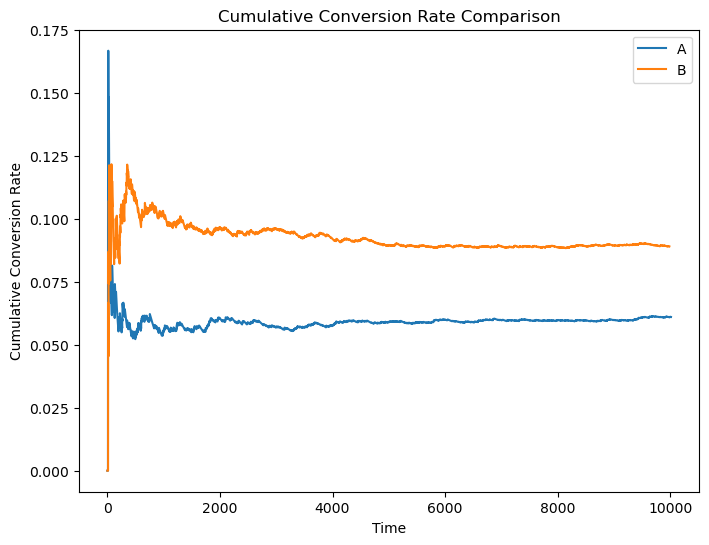

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Amestecă datele așa cum sunt ele sortate în prezent în funcție de valoarea de conversie
# Dacă am folosi date reale, acestea ar fi sortate după dată și oră.
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Calculăm media cumulativă - aceasta este modificarea conversiei în timp.
cumulative_metric_a = test_data[test_data['test_group'] == 'A']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = test_data[test_data['test_group'] == 'B']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_metric_a, label='A')
plt.plot(cumulative_metric_b, label='B')

plt.title('Cumulative Сonversion Rate Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Сonversion Rate')

plt.legend()
plt.show()